In [1]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
cluster_data = titanic[['Fare','Age']].copy(deep=True)
cluster_data.dropna(axis=0, inplace=True)
cluster_data.sort_values(by=['Fare','Age'], inplace=True)
cluster_data.head(10)

,Fare,Age
302,0.0000,19.0
271,0.0000,25.0
179,0.0000,36.0
822,0.0000,38.0
806,0.0000,39.0
263,0.0000,40.0
597,0.0000,49.0
378,4.0125,20.0
872,5.0000,33.0
326,6.2375,61.0


In [4]:
cluster_array = np.array(cluster_data)
print(cluster_array[0:10])

[[ 0.     19.    ]
 [ 0.     25.    ]
 [ 0.     36.    ]
 [ 0.     38.    ]
 [ 0.     39.    ]
 [ 0.     40.    ]
 [ 0.     49.    ]
 [ 4.0125 20.    ]
 [ 5.     33.    ]
 [ 6.2375 61.    ]]


In [5]:
cluster_array.shape

(714, 2)

In [6]:
#k = 4
k=0
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
    print(f"idx{idx}\n")
    print(f"centroids\n{centroids}\n")
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
            
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points,distances


In [33]:
k=5

label,distances = kmeans(cluster_array,k,10)
print(cluster_array[0])


idx[397  67 385 102 458]

centroids
[[20.525  33.    ]
 [ 7.7333 21.    ]
 [19.2583  0.75  ]
 [ 7.7958 28.    ]
 [26.25   31.    ]]

[ 0. 19.]


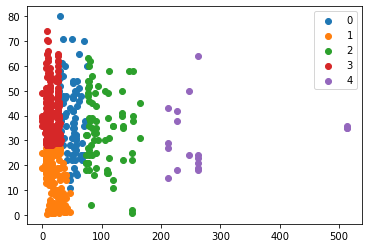

In [34]:
#Visualize the results
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(cluster_array[label == i , 0] , cluster_array[label == i , 1] , label = i)
plt.legend()
plt.show()

In [15]:
SSE = []
for k in range(1,10):   
    label,distances = kmeans(cluster_array,k,10)
    SSE.append(np.sum(pow(distances.min(axis=1),2))/len(cluster_array))

idx[532]

centroids
[[32.5 34. ]]

idx[636 225]

centroids
[[78.2667 54.    ]
 [ 9.5    28.    ]]

idx[337 322 314]

centroids
[[14.4542 14.5   ]
 [13.     42.    ]
 [13.     36.    ]]

idx[163 346 287 412]

centroids
[[ 8.05 16.  ]
 [14.5  24.  ]
 [13.   19.  ]
 [23.    4.  ]]

idx[693 146 133 680 250]

centroids
[[153.4625  58.    ]
 [  7.925   21.    ]
 [  7.8958  28.    ]
 [133.65    50.    ]
 [ 10.5     29.    ]]

idx[265 251 518 549 515 155]

centroids
[[11.1333  4.    ]
 [10.5    30.    ]
 [31.     30.    ]
 [38.5    47.    ]
 [30.5    52.    ]
 [ 7.925  32.    ]]

idx[546 262 450 664 395  82 677]

centroids
[[ 36.75   19.   ]
 [ 10.5    70.   ]
 [ 26.     44.   ]
 [ 93.5    30.   ]
 [ 20.525   9.   ]
 [  7.75   70.5  ]
 [120.     14.   ]]

idx[561 242 691  45 159 218 152 338]

centroids
[[ 39.6875  41.    ]
 [ 10.5     19.    ]
 [153.4625  38.    ]
 [  7.2292  30.    ]
 [  7.925   39.    ]
 [  9.35    22.    ]
 [  7.925   28.    ]
 [ 14.4542  15.    ]]

idx[537 345 298 489 249 

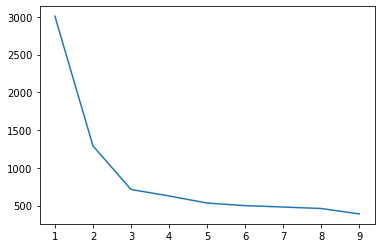

In [16]:
k = range(1,10)
plt.plot(k,SSE)